# Analysis

Template for Jupyter notebooks running Python.

Version 0.1.0 \| First Created July 12, 2023 \| Updated August 01, 2023

## Jupyter Notebook

This is an Jupyter Notebook document. For more details on using a Jupyter Notebook see <https://docs.jupyter.org/en/latest/>.

### Setting up a computational environment. 
Please see proceedure/environment/readme.md for detailed instructions for how to replicate the computational environment used in this study.



# Title of Study

### Authors

- First Name Last Name\*, email address, @githubname, ORCID link, affiliated institution(s)
- First Name Last Name, email address, @githubname, ORCID link, affiliated institution(s)

\* Corresponding author and creator



### Abstract

Write a brief abstract about your research project.

If the project is a reproduction or replication study, include a declaration of the study type with a full reference to the original study.
For example:

This study is a *replication* of:

> citation to prior study

A graphical abstract of the study could also be included as an image here.



### Study metadata

- `Key words`: Comma-separated list of keywords (tags) for searchability. Geographers often use one or two keywords each for: theory, geographic context, and methods.
- `Subject`: select from the [BePress Taxonomy](http://digitalcommons.bepress.com/cgi/viewcontent.cgi?article=1008&context=reference)
- `Date created`: date when project was started
- `Date modified`: date of most recent revision
- `Spatial Coverage`: Specify the geographic extent of your study. This may be a place name and link to a feature in a gazetteer like GeoNames or OpenStreetMap, or a well known text (WKT) representation of a bounding box.
- `Spatial Resolution`: Specify the spatial resolution as a scale factor, description of the level of detail of each unit of observation (including administrative level of administrative areas), and/or or distance of a raster GRID size
- `Spatial Reference System`: Specify the geographic or projected coordinate system for the study, e.g. EPSG:4326
- `Temporal Coverage`: Specify the temporal extent of your study---i.e. the range of time represented by the data observations.
- `Temporal Resolution`: Specify the temporal resolution of your study---i.e. the duration of time for which each observation represents or the revisit period for repeated observations
- `Funding Name`: name of funding for the project
- `Funding Title`: title of project grant
- `Award info URI`: web address for award information
- `Award number`: award number

#### Original study spatio-temporal metadata

- `Spatial Coverage`: extent of original study
- `Spatial Resolution`: resolution of original study
- `Spatial Reference System`: spatial reference system of original study
- `Temporal Coverage`: temporal extent of original study
- `Temporal Resolution`: temporal resolution of original study



## Study design

Describe how the study relates to prior literature, e.g. is it a **original study**, **meta-analysis study**, **reproduction study**, **reanalysis study**, or **replication study**?

Also describe the original study archetype, e.g. is it **observational**, **experimental**, **quasi-experimental**, or **exploratory**?

Enumerate specific **hypotheses** to be tested or **research questions** to be investigated here, and specify the type of method, statistical test or model to be used on the hypothesis or question.


## Proceedure

In [1]:
# Import the necessary packages
import geopandas as gpd
import pandas as pd
import geodatasets as gds
import yaml
import os
import numpy as np
import osmnx as ox
import pyogrio


In [29]:
# Write the YAML file with package dependencies
##create if statement set to false so that this wont always run ***!
## code adapted from python land https://python.land/data-processing/python-yaml#What_is_YAML
requirements = """
- openpyxl
- pyyaml
"""
req = yaml.safe_load(requirements)
with open ('req.yaml', 'w') as file:
    yaml.dump(req, file)

print(open('req.yaml').read())

- openpyxl
- pyyaml



In [30]:
# move req file to envs folder 
os.replace("req.yaml", "../environment/req.yaml") 

In [31]:
path = os.path.abspath('req.yaml')
print(path)

C:\Users\gsokolow\Documents\GitHub\Flooding-and-Healthcare-2024\procedure\code\req.yaml


In [2]:
# Import 2018 Census Data for Statistical Area 1s
# Select only the columns we're interested in
sa1 = pd.read_csv("../../data/derived/public/Individual_part1_totalNZ-wide_format_updated_16-7-20_adjusted_labels.csv",
                     usecols = ['Area_code_and_description', #uniqueid for sa1 
                                'Census_2018_usually_resident_population_count', #total pop
                                'Census_2018_Sex_1_Male_CURP', 'Census_2018_Sex_2_Female_CURP', 'Census_2018_Sex_Total_CURP', #sex
                                'Census_2018_median_age_CURP', 'Census_2018_Age_broad_groups_1_Under_15_years_CURP', 'Census_2018_Age_broad_groups_2_15_to_29_years_CURP', 
                                'Census_2018_Age_broad_groups_3_30_to_64_years_CURP', 'Census_2018_Age_broad_groups_4_65_years_and_over_CURP', 
                                'Census_2018_Age_broad_groups_Total_CURP', #age
                                'Census_2018_Ethnicity_grouped_total_responses_level_1_1_European_CURP',
                                'Census_2018_Ethnicity_grouped_total_responses_level_1_3_Pacific_Peoples_CURP', 'Census_2018_Ethnicity_grouped_total_responses_level_1_2_Maori_CURP', 'Census_2018_Ethnicity_grouped_total_responses_level_1_4_Asian_CURP',
                                'Census_2018_Ethnicity_grouped_total_responses_level_1_5_Middle_Eastern_Latin_American_African_CURP', 'Census_2018_Ethnicity_grouped_total_responses_level_1_6_Other_Ethnicity_CURP',
                                'Census_2018_Ethnicity_grouped_total_responses_level_2_61_New_Zealander_CURP', 'Census_2018_Ethnicity_grouped_total_responses_level_2_69_Other_Ethnicity_nec_CURP',
                                'Census_2018_Ethnicity_grouped_total_responses_Total_stated_CURP', 'Census_2018_Ethnicity_grouped_total_responses_level_1_9_Not_Elsewhere_Included_CURP',
                                'Census_2018_Ethnicity_grouped_total_responses_Total_CURP', #ethnicity,
                                'Census_2018_Maori_descent_01_Maori_descent_CURP', 'Census_2018_Maori_descent_02_No_Maori_descent_CURP', 'Census_2018_Maori_descent_04_Dont_know_CURP',
                                'Census_2018_Maori_descent_Total_stated_CURP', 'Census_2018_Maori_descent_99_Not_elsewhere_included_CURP', 'Census_2018_Maori_descent_Total_CURP'
                               ],
                 na_values = 'C') #replaces 'C' for confidential with NaN. 


In [33]:
# Make sure the data loaded in correctly. It did! YAY!
sa1.head()

,Area_code_and_description,Census_2018_usually_resident_population_count,Census_2018_Sex_1_Male_CURP,Census_2018_Sex_2_Female_CURP,Census_2018_Sex_Total_CURP,Census_2018_median_age_CURP,Census_2018_Age_broad_groups_1_Under_15_years_CURP,Census_2018_Age_broad_groups_2_15_to_29_years_CURP,Census_2018_Age_broad_groups_3_30_to_64_years_CURP,Census_2018_Age_broad_groups_4_65_years_and_over_CURP,...,Census_2018_Ethnicity_grouped_total_responses_level_2_69_Other_Ethnicity_nec_CURP,Census_2018_Ethnicity_grouped_total_responses_Total_stated_CURP,Census_2018_Ethnicity_grouped_total_responses_level_1_9_Not_Elsewhere_Included_CURP,Census_2018_Ethnicity_grouped_total_responses_Total_CURP,Census_2018_Maori_descent_01_Maori_descent_CURP,Census_2018_Maori_descent_02_No_Maori_descent_CURP,Census_2018_Maori_descent_04_Dont_know_CURP,Census_2018_Maori_descent_Total_stated_CURP,Census_2018_Maori_descent_99_Not_elsewhere_included_CURP,Census_2018_Maori_descent_Total_CURP
0,7000000,141,75.0,66.0,141,48.1,24.0,30.0,69.0,21.0,...,0.0,141.0,0.0,141,135.0,6.0,3.0,141.0,0.0,141
1,7000001,114,60.0,54.0,114,36.5,30.0,21.0,48.0,18.0,...,0.0,114.0,0.0,114,96.0,18.0,0.0,114.0,0.0,114
2,7000002,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0
3,7000003,225,120.0,105.0,225,30.5,57.0,54.0,75.0,36.0,...,0.0,225.0,0.0,225,210.0,15.0,0.0,225.0,0.0,225
4,7000004,138,69.0,66.0,138,52.2,24.0,15.0,69.0,30.0,...,0.0,138.0,0.0,138,102.0,30.0,3.0,138.0,0.0,138


In [32]:
## remove the leading SA1 prefix for area codes. This is necessary for the join to work with the geometric data.
sa1["Area_code_and_description"]=sa1.Area_code_and_description.str.replace("SA1 ","", regex = True)

In [4]:
# Import the definitions of the variables we are interested in (created by author based on best available information)
sa1_sel_defs = pd.read_csv("../../data/metadata/2018_Census_Statistical_Area1_Definitions_for_select_variables.csv", index_col = 0, dtype = object)

## Generate metadata
Now, we're going to generate some information about the datasets we're using.

In [5]:
samin = pd.DataFrame(sa1.min(0).rename('minimum'))

In [6]:
samax = pd.DataFrame(sa1.max(0).rename('maximum'))

In [7]:
sa1.isna().sum()

Area_code_and_description                                                                               0
Census_2018_usually_resident_population_count                                                           0
Census_2018_Sex_1_Male_CURP                                                                           575
Census_2018_Sex_2_Female_CURP                                                                         575
Census_2018_Sex_Total_CURP                                                                              0
Census_2018_median_age_CURP                                                                           592
Census_2018_Age_broad_groups_1_Under_15_years_CURP                                                    620
Census_2018_Age_broad_groups_2_15_to_29_years_CURP                                                    620
Census_2018_Age_broad_groups_3_30_to_64_years_CURP                                                    614
Census_2018_Age_broad_groups_4_65_years_and_ov

In [8]:
freqna = ((sa1.isna().sum())/len(sa1)).rename('NaN frequency')

In [9]:
sa1_types = sa1.dtypes.rename('data type')

In [10]:
#let's make a big table to display all the metadata
meta_nums = pd.DataFrame(sa1_types)
meta_nums = meta_nums.join(samin, rsuffix = 'min')
meta_nums = meta_nums.join(samax, rsuffix = 'max')
meta_nums = meta_nums.join(freqna, rsuffix = 'freq NA')
meta_nums = meta_nums.join(sa1_sel_defs)


In [11]:
meta_nums.head()

,data type,minimum,maximum,NaN frequency,definition
Area_code_and_description,object,001 Far North District,Total NZ (Ward),0.000000,unique identifier for statistical area 1
Census_2018_usually_resident_population_count,int64,0,4699755,0.000000,number of usual residents (as opposed to popul...
Census_2018_Sex_1_Male_CURP,float64,0.0,2319558.0,0.017681,number of usual male residents in 2018
Census_2018_Sex_2_Female_CURP,float64,0.0,2380197.0,0.017681,number of usual female residents in 2018
Census_2018_Sex_Total_CURP,int64,0,4699755,0.000000,total number of usual residents for which data...


In [12]:
# Save the Metadata
meta_nums.to_csv('../../data/metadata/2018_Census_Statistical_Area1_Metadata_Derived.csv')

### Calculate percentages
Deviation from analysis plan. For ease of implementation, calculate the population percentages for each of the following variables PRIOR to joining the attribute data with the statistical area 1 geometry.
    - Census_2018_Ethnicity_grouped_total_responses_level_1_1_European_CURP
   - Census_2018_Ethnicity_grouped_total_responses_level_1_3_Pacific_Peoples_CURP
   - Census_2018_Ethnicity_grouped_total_responses_level_1_2_Maori_CURP
   - Census_2018_Ethnicity_grouped_total_responses_level_1_4_Asian_CURP
   - Census_2018_Ethnicity_grouped_total_responses_level_1_6_Other_Ethnicity_CURP
   - Census_2018_Ethnicity_grouped_total_responses_level_2_61_New_Zealander_CURP
   - Census_2018_Maori_descent_01_Maori_descent_CURP
   - Census_2018_Maori_descent_02_No_Maori_descent_CURP
   - Census_2018_Maori_descent_04_Dont_know_CURP

In [34]:
sa1_pct = sa1[
["Census_2018_Ethnicity_grouped_total_responses_level_1_3_Pacific_Peoples_CURP",
    "Census_2018_Ethnicity_grouped_total_responses_level_1_2_Maori_CURP",
    "Census_2018_Ethnicity_grouped_total_responses_level_1_4_Asian_CURP",
    "Census_2018_Ethnicity_grouped_total_responses_level_1_6_Other_Ethnicity_CURP",
    "Census_2018_Ethnicity_grouped_total_responses_level_2_61_New_Zealander_CURP",
    "Census_2018_Maori_descent_01_Maori_descent_CURP",
    "Census_2018_Maori_descent_02_No_Maori_descent_CURP",
    "Census_2018_Maori_descent_04_Dont_know_CURP"]
].div(sa1["Census_2018_usually_resident_population_count"], axis = "rows")

In [14]:
sa1_pct.head()

,Census_2018_Ethnicity_grouped_total_responses_level_1_3_Pacific_Peoples_CURP,Census_2018_Ethnicity_grouped_total_responses_level_1_2_Maori_CURP,Census_2018_Ethnicity_grouped_total_responses_level_1_4_Asian_CURP,Census_2018_Ethnicity_grouped_total_responses_level_1_6_Other_Ethnicity_CURP,Census_2018_Ethnicity_grouped_total_responses_level_2_61_New_Zealander_CURP,Census_2018_Maori_descent_01_Maori_descent_CURP,Census_2018_Maori_descent_02_No_Maori_descent_CURP,Census_2018_Maori_descent_04_Dont_know_CURP
0,0.063830,0.893617,0.021277,0.0,0.0,0.957447,0.042553,0.021277
1,0.131579,0.815789,0.000000,0.0,0.0,0.842105,0.157895,0.000000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.093333,0.920000,0.013333,0.0,0.0,0.933333,0.066667,0.000000
4,0.043478,0.717391,0.021739,0.0,0.0,0.739130,0.217391,0.021739


## Read SA1 geometry data

In [27]:
sa1_geom = gpd.read_file("../../data/raw/public/statistical-area-1-2018-generalised.gpkg")

In [28]:
sa1_geom.head()

,SA12018_V1_00,LANDWATER,LANDWATER_NAME,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry
0,7017656,12,Mainland,20.538149,20.538149,25612.858923,"MULTIPOLYGON (((1764706.229 5594477.577, 17647..."
1,7017657,12,Mainland,15.116965,15.116965,26048.231791,"MULTIPOLYGON (((1764847.805 5587487.240, 17648..."
2,7017660,12,Mainland,11.117117,11.117117,20192.697724,"MULTIPOLYGON (((1768154.253 5589857.396, 17681..."
3,7017661,12,Mainland,15.730712,15.730712,24652.197813,"MULTIPOLYGON (((1765779.890 5588211.280, 17658..."
4,7016695,12,Mainland,211.980778,211.980778,92062.098112,"MULTIPOLYGON (((1884831.019 5593384.334, 18848..."


In [35]:
#merge geodataframe with attribute data
sa1_geom_m = pd.merge(sa1_geom, sa1, left_on="SA12018_V1_00", right_on="Area_code_and_description")

In [36]:
sa1_geom_m.head()

,SA12018_V1_00,LANDWATER,LANDWATER_NAME,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry,Area_code_and_description,Census_2018_usually_resident_population_count,Census_2018_Sex_1_Male_CURP,...,Census_2018_Ethnicity_grouped_total_responses_level_2_69_Other_Ethnicity_nec_CURP,Census_2018_Ethnicity_grouped_total_responses_Total_stated_CURP,Census_2018_Ethnicity_grouped_total_responses_level_1_9_Not_Elsewhere_Included_CURP,Census_2018_Ethnicity_grouped_total_responses_Total_CURP,Census_2018_Maori_descent_01_Maori_descent_CURP,Census_2018_Maori_descent_02_No_Maori_descent_CURP,Census_2018_Maori_descent_04_Dont_know_CURP,Census_2018_Maori_descent_Total_stated_CURP,Census_2018_Maori_descent_99_Not_elsewhere_included_CURP,Census_2018_Maori_descent_Total_CURP
0,7017656,12,Mainland,20.538149,20.538149,25612.858923,"MULTIPOLYGON (((1764706.229 5594477.577, 17647...",7017656,153,72.0,...,0.0,153.0,0.0,153,24.0,126.0,3.0,153.0,0.0,153
1,7017657,12,Mainland,15.116965,15.116965,26048.231791,"MULTIPOLYGON (((1764847.805 5587487.240, 17648...",7017657,180,90.0,...,0.0,180.0,0.0,180,54.0,120.0,6.0,180.0,0.0,180
2,7017660,12,Mainland,11.117117,11.117117,20192.697724,"MULTIPOLYGON (((1768154.253 5589857.396, 17681...",7017660,120,60.0,...,0.0,120.0,0.0,120,18.0,102.0,3.0,120.0,0.0,120
3,7017661,12,Mainland,15.730712,15.730712,24652.197813,"MULTIPOLYGON (((1765779.890 5588211.280, 17658...",7017661,204,105.0,...,0.0,204.0,0.0,204,18.0,186.0,0.0,204.0,0.0,204
4,7016695,12,Mainland,211.980778,211.980778,92062.098112,"MULTIPOLYGON (((1884831.019 5593384.334, 18848...",7016695,141,75.0,...,0.0,141.0,0.0,141,27.0,105.0,12.0,141.0,0.0,141


<Axes: >

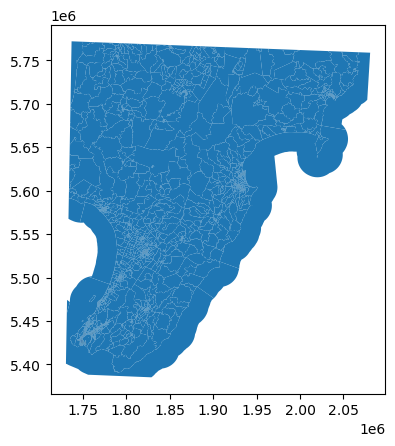

In [40]:
sa1_geom_m.plot()

### IM GOING TO NEED TO COME BACK HERE AND FILTER FOR ONLY HAWKES BAY - MAYBE USING AN OUTLINE?

In [37]:
#save the joined data
sa1_geom_m.to_file("../../data/derived/public/sa1_2018_joined.geojson", driver='GeoJSON')

In [ ]:
#calculate the pct of the population represented by each variable by dividing by the total population


### Create Centroids

In [38]:
sa1_c = sa1_geom_m.centroid

<Axes: >

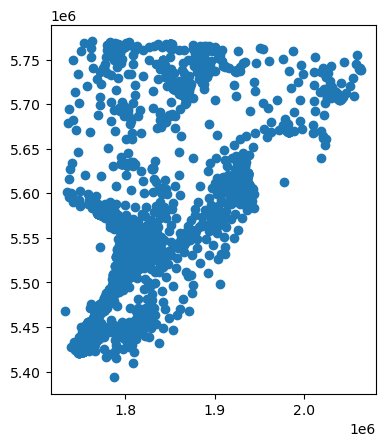

In [39]:
sa1_c.plot()

## Read in OSM data

In [7]:
# going to try to use this; will see! https://python.plainenglish.io/osmnx-the-fastest-way-to-get-data-from-openstreetmaps-731419d4dc31
#location 
region_name = "New Zealand" 
#or 'City, Country' if you have city that meets more 
#...than one time in the world

#sometimes you need to play with which_result parameter
#because you can receive node point, not the polygon
region = ox.geocoder.geocode_to_gdf(region_name, which_result=2)

region.plot(figsize=(15,15))
plt.title(region_name, fontdict={'fontsize':15})
plt.grid()

InsufficientResponseError: Nominatim returned 1 result(s) but which_result=2

### Analysis

Describe the methods of analysis that will directly test the hypotheses or provide results to answer the research questions.
This section should explicitly define any spatial / statistical *models* and their *parameters*, including *grouping* criteria, *weighting* criteria, and *significance thresholds*.
Also explain any follow-up analyses or validations.



## Results

Describe how results are to be presented.



## Discussion

Describe how the results are to be interpreted *vis a vis* each hypothesis or research question.



## Integrity Statement

Include an integrity statement - The authors of this preregistration state that they completed this preregistration to the best of their knowledge and that no other preregistration exists pertaining to the same hypotheses and research.
If a prior registration *does* exist, explain the rationale for revising the registration here.



# Acknowledgements

- `Funding Name`: name of funding for the project
- `Funding Title`: title of project grant
- `Award info URI`: web address for award information
- `Award number`: award number

This report is based upon the template for Reproducible and Replicable Research in Human-Environment and Geographical Sciences, DOI:[10.17605/OSF.IO/W29MQ](https://doi.org/10.17605/OSF.IO/W29MQ)

## References